# AtliQ Grand Hospitality Data Analysis with Python

### Step 01. Importing Python Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as mpl

### Step 02. Extracting the Data - Importing the Datasets

In [2]:
# Importing Data to be Extracted
dim_date = pd.read_csv('C:\\Users\\Mayur\\Desktop\\Unified Mentor\\Atliq Grand Hospitality\\dim_date.csv')
dim_hotels = pd.read_csv('C:\\Users\\Mayur\\Desktop\\Unified Mentor\\Atliq Grand Hospitality\\dim_hotels.csv')
dim_rooms = pd.read_csv('C:\\Users\\Mayur\\Desktop\\Unified Mentor\\Atliq Grand Hospitality\\dim_rooms.csv')
fact_aggregated_bookings = pd.read_csv('C:\\Users\\Mayur\\Desktop\\Unified Mentor\\Atliq Grand Hospitality\\fact_aggregated_bookings.csv')
fact_bookings = pd.read_csv('C:\\Users\\Mayur\\Desktop\\Unified Mentor\\Atliq Grand Hospitality\\fact_bookings.csv')

In [3]:
# Checking dataframe 'dim_date' 
print(dim_date.columns)
print(dim_date.info())

Index(['date', 'Month & Year', 'week no', 'day_type'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          92 non-null     object
 1   Month & Year  92 non-null     object
 2   week no       92 non-null     object
 3   day_type      92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB
None


In [4]:
# Checking dataframe 'dim_hotels'
print(dim_hotels.columns)
print(dim_hotels.info())

Index(['property_id', 'property_name', 'category', 'city'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   property_id    25 non-null     int64 
 1   property_name  25 non-null     object
 2   category       25 non-null     object
 3   city           25 non-null     object
dtypes: int64(1), object(3)
memory usage: 932.0+ bytes
None


In [6]:
# Checking dataframe 'dim_rooms'
print(dim_rooms.columns)
print(dim_rooms.info())

Index(['room_id', 'room_class'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   room_id     4 non-null      object
 1   room_class  4 non-null      object
dtypes: object(2)
memory usage: 196.0+ bytes
None


In [5]:
# Checking dataframe 'fact_aggregated_bookings'
print(fact_aggregated_bookings.columns)
print(fact_aggregated_bookings.info())

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   property_id          9200 non-null   int64 
 1   check_in_date        9200 non-null   object
 2   room_category        9200 non-null   object
 3   successful_bookings  9200 non-null   int64 
 4   capacity             9200 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 359.5+ KB
None


In [6]:
# Checking dataframe 'fact_bookings'
print(fact_bookings.columns)
print(fact_bookings.info())

Index(['booking_id', 'property_id', 'booking_date', 'check_in_date',
       'checkout_date', 'no_guests', 'room_category', 'booking_platform',
       'ratings_given', 'booking_status', 'revenue_generated',
       'revenue_realized'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134590 non-null  int64  
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int6

In [7]:
# Checking for Null Values in dataframe 'fact_bookings'
fact_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77907
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [8]:
# Cleaning the Data in the dataframe 'fact_bookings'
fact_bookings[fact_bookings.no_guests>0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-2022,01-05-2022,02-05-2022,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-2022,01-05-2022,02-05-2022,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-2022,01-05-2022,04-05-2022,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,28-04-2022,01-05-2022,02-05-2022,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-2022,01-05-2022,02-05-2022,4,RT1,direct online,5.0,Checked Out,10920,10920
...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,29-07-2022,31-07-2022,03-08-2022,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134586,Jul312217564RT47,17564,30-07-2022,31-07-2022,01-08-2022,4,RT4,logtrip,2.0,Checked Out,38760,38760
134587,Jul312217564RT48,17564,30-07-2022,31-07-2022,02-08-2022,1,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-2022,31-07-2022,01-08-2022,2,RT4,logtrip,2.0,Checked Out,32300,32300


##### The Dataframe 'fact_bookings' will remain intact as all the rows of the column 'no_guests' have guests >= 1.

### Step 03: Data Cleaning

#### A. Checking dataframe 'fact_booking'

In [9]:
# Checking for Outliers in the column 'revenue_generated'.
min_01, max_01 = fact_bookings.revenue_generated.min(), fact_bookings.revenue_generated.max()
print("Minimum is:",min_01)
print("Maximum is:",max_01)

Minimum is: 6500
Maximum is: 45220


In [10]:
# Checking for Average, Median and Standard Deviation of the column 'revenue_generated'.
average_01 = fact_bookings.revenue_generated.mean()
print("Average is:",round(average_01, 3))

median_01 = fact_bookings.revenue_generated.median()
print("Median is:",round(median_01, 3))

std_dev_01 = fact_bookings.revenue_generated.std()
print("Standard Deviation is:",round(std_dev_01, 3))

Average is: 14916.013
Median is: 13500.0
Standard Deviation is: 6452.868


In [11]:
# Setting the Upper Limit
higher_limit_01 = average_01 + (3*std_dev_01)
print("Upper Limit is:",round(higher_limit_01,3))

# Setting the Lower Limit
lower_limit_01 = average_01 - (3*std_dev_01)
print("Lower Limit is:",round(lower_limit_01,3))

Upper Limit is: 34274.617
Lower Limit is: -4442.591


##### Note: There are no negative values in the 'revenue_generated' column and there are no outliers.

In [12]:
# Checking for Outliers in the column 'revenue_realized'.
min_02, max_02 = fact_bookings.revenue_realized.min(), fact_bookings.revenue_realized.max()
print("Minimum is:",min_02)
print("Maximum is:",max_02)

Minimum is: 2600
Maximum is: 45220


In [13]:
# Checking for Average, Median and Standard Deviation of the column 'revenue_realized'.
average_02 = fact_bookings.revenue_realized.mean()
print("Average is:",round(average_02, 3))

median_02 = fact_bookings.revenue_realized.median()
print("Median is:",round(median_02, 3))

std_dev_02 = fact_bookings.revenue_realized.std()
print("Standard Deviation is:",round(std_dev_02, 3))

Average is: 12696.123
Median is: 11700.0
Standard Deviation is: 6928.108


In [14]:
# Setting the Upper Limit
higher_limit_02 = average_02 + (3*std_dev_02)
print("Upper Limit is:",round(higher_limit_02,3))

# Setting the Lower Limit
lower_limit_02 = average_02 - (3*std_dev_02)
print("Lower Limit is:",round(lower_limit_02,3))

Upper Limit is: 33480.448
Lower Limit is: -8088.201


In [15]:
# Obtaining Rows where revenue_realized is greater than Upper Limit
fact_bookings[fact_bookings.revenue_realized>higher_limit_02]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-2022,01-05-2022,07-05-2022,4,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,01-05-2022,01-05-2022,02-05-2022,6,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-2022,01-05-2022,03-05-2022,3,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-2022,01-05-2022,07-05-2022,5,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-2022,01-05-2022,03-05-2022,5,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134331,Jul312219560RT412,19560,31-07-2022,31-07-2022,01-08-2022,6,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-2022,31-07-2022,01-08-2022,6,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-2022,31-07-2022,06-08-2022,5,RT4,direct offline,5.0,Checked Out,37050,37050
134581,Jul312217564RT42,17564,31-07-2022,31-07-2022,01-08-2022,4,RT4,makeyourtrip,4.0,Checked Out,38760,38760


##### Of the 134590 rows, only 1300 rows have their Realized Revenue greater than Upper Limit.
##### All the 1300 rows have 'room_category' as RT4 which is a Presidential Suite. As RT4 is a luxurious room, its rent will be higher.
##### To make fair assessment, perform data analysis on the 'room_category' RT4.  

In [16]:
# Creating new dataframe RT4
RT4 = fact_bookings[fact_bookings.room_category=="RT4"]

# Using dataframe RT4
RT4.revenue_realized.describe()

count    16073.000000
mean     23440.103652
std       9048.865206
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [17]:
# Calculating Mean and Standard Deviation for column 'revenue_realized' where room_category = RT4
average_03 = RT4.revenue_realized.mean()
print("Average of Realized Revenue for Room Type RT4:",round(average_03, 3))
std_dev_03 = RT4.revenue_realized.std()
print("Standard Deviation of Realized Revenue for Room Type RT4:",round(std_dev_03, 3))

# Calculating Upper Limit for column 'revenue_realized' where room_category = RT4
higher_limit_03 = average_03 + (3*std_dev_03) 
print("Upper Limit of Realized Revenue for Room Type RT4:",round(higher_limit_03, 3))

Average of Realized Revenue for Room Type RT4: 23440.104
Standard Deviation of Realized Revenue for Room Type RT4: 9048.865
Upper Limit of Realized Revenue for Room Type RT4: 50586.699


##### The Upper Limit of Realized Revenue for Room Type RT4 is 50586.699. 
##### The Average of Realized Revenue for Room Type RT4 is 23440.1. 
##### Thus, it can be concluded that there is NO Outlier on the column 'revenue_realized'. Hence, there is no requirement for any cleaning.

#### B. Checking dataframe 'fact_aggregate_booking'

In [18]:
# Checking for Null values in dataframe 'fact_aggregated_bookings'
fact_aggregated_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

##### Thus, there are no Null Values in the dataframe 'fact_aggregated_bookings'

### Step 04. Data Transformation

In [19]:
# Creating Occupancy Percentage (occ_pct) column in the dataframe 'fact_aggregated_bookings'
fact_aggregated_bookings["occ_pct"] = round((fact_aggregated_bookings.successful_bookings/fact_aggregated_bookings.capacity)*100, 2)
fact_aggregated_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,01-May-22,RT1,25,30,83.33
1,19562,01-May-22,RT1,28,30,93.33
2,19563,01-May-22,RT1,23,30,76.67
3,17558,01-May-22,RT1,13,19,68.42
4,16558,01-May-22,RT1,18,19,94.74
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18,72.22
9196,16559,31-Jul-22,RT4,13,18,72.22
9197,17558,31-Jul-22,RT4,3,6,50.00
9198,19563,31-Jul-22,RT4,3,6,50.00


In [20]:
# Checking for Data Type formats
fact_aggregated_bookings.dtypes

property_id              int64
check_in_date           object
room_category           object
successful_bookings      int64
capacity                 int64
occ_pct                float64
dtype: object

##### Column 'check_in_date' is in Generic format, and needs to be changed to DateTime format.

In [21]:
# Converting format of column 'check_in_date' from Generic format to Datetime format
fact_aggregated_bookings.check_in_date = pd.to_datetime(fact_aggregated_bookings.check_in_date)

C:\Users\Mayur\AppData\Local\Temp\ipykernel_20104\2787567318.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fact_aggregated_bookings.check_in_date = pd.to_datetime(fact_aggregated_bookings.check_in_date)


In [22]:
# Checking for Data Type format of dataframe 'fact_aggregated_bookings'
fact_aggregated_bookings.dtypes

property_id                     int64
check_in_date          datetime64[ns]
room_category                  object
successful_bookings             int64
capacity                        int64
occ_pct                       float64
dtype: object

##### Column 'check_in_date' has been converted to Datetime format

### Step 05. Data Analysis

##### A. Occupancy Rate by Room Category

In [23]:
# Calculating Average Occupancy Rate in each of the Room Categories
fact_aggregated_bookings.groupby("room_category")["occ_pct"].mean()

room_category
RT1    57.919022
RT2    58.007948
RT3    58.028213
RT4    59.278722
Name: occ_pct, dtype: float64

In [24]:
# Creating new Dataframe 'data_01' by Merging dataframes 'fact_aggregated_bookings' and 'dim_rooms' on columns "room_category" and "room_id"
data_01 = pd.merge(fact_aggregated_bookings,dim_rooms,left_on="room_category", right_on="room_id")
data_01

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,2022-05-01,RT1,25,30,83.33,RT1,Standard
1,19562,2022-05-01,RT1,28,30,93.33,RT1,Standard
2,19563,2022-05-01,RT1,23,30,76.67,RT1,Standard
3,17558,2022-05-01,RT1,13,19,68.42,RT1,Standard
4,16558,2022-05-01,RT1,18,19,94.74,RT1,Standard
...,...,...,...,...,...,...,...,...
9195,16563,2022-07-31,RT4,13,18,72.22,RT4,Presidential
9196,16559,2022-07-31,RT4,13,18,72.22,RT4,Presidential
9197,17558,2022-07-31,RT4,3,6,50.00,RT4,Presidential
9198,19563,2022-07-31,RT4,3,6,50.00,RT4,Presidential


In [25]:
# Dropping column "room_id" from the dataframe 'data_01'
data_01.drop("room_id",axis=1,inplace=True)
data_01

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,2022-05-01,RT1,25,30,83.33,Standard
1,19562,2022-05-01,RT1,28,30,93.33,Standard
2,19563,2022-05-01,RT1,23,30,76.67,Standard
3,17558,2022-05-01,RT1,13,19,68.42,Standard
4,16558,2022-05-01,RT1,18,19,94.74,Standard
...,...,...,...,...,...,...,...
9195,16563,2022-07-31,RT4,13,18,72.22,Presidential
9196,16559,2022-07-31,RT4,13,18,72.22,Presidential
9197,17558,2022-07-31,RT4,3,6,50.00,Presidential
9198,19563,2022-07-31,RT4,3,6,50.00,Presidential


In [26]:
# Calculating Average Occupancy Rate by Room Class from dataframe 'data_01'
data_01.groupby("room_class")["occ_pct"].mean()

room_class
Elite           58.007948
Premium         58.028213
Presidential    59.278722
Standard        57.919022
Name: occ_pct, dtype: float64

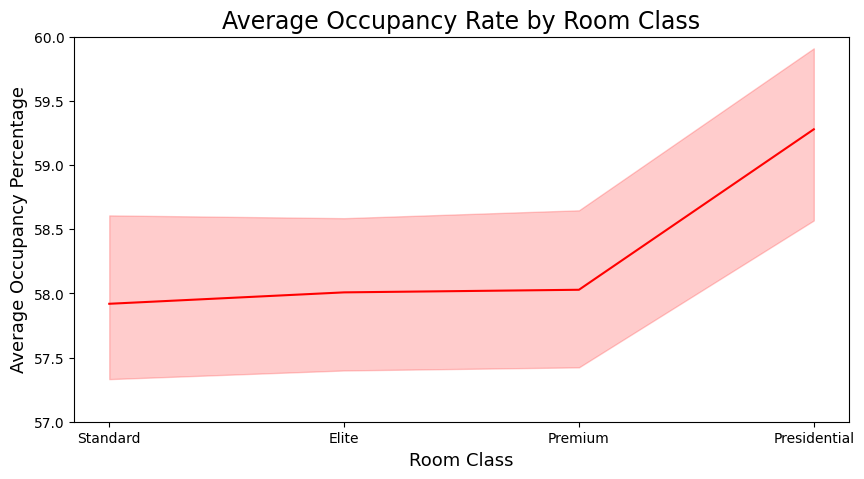

In [27]:
# Line Plot of Average Occupancy Rate by Room Class
mpl.figure(figsize=(10,5))
sb.lineplot(x=data_01['room_class'], y=data_01['occ_pct'], color='r')
mpl.title('Average Occupancy Rate by Room Class', fontsize=17)
mpl.xlabel('Room Class', fontsize=13)
mpl.ylabel('Average Occupancy Percentage', fontsize=13)
mpl.ylim([57.0,60.0])
mpl.show()

##### B. Calculation of Occupancy Rate by City

In [28]:
# Creating new Dataframe 'data_02' by Merging dataframes 'data_01' and 'dim_hotels' on column "property_id"
data_02 = pd.merge(data_01, dim_hotels, on="property_id")
data_02

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,2022-05-01,RT1,25,30,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,2022-05-01,RT1,28,30,93.33,Standard,Atliq Bay,Luxury,Bangalore
2,19563,2022-05-01,RT1,23,30,76.67,Standard,Atliq Palace,Business,Bangalore
3,17558,2022-05-01,RT1,13,19,68.42,Standard,Atliq Grands,Luxury,Mumbai
4,16558,2022-05-01,RT1,18,19,94.74,Standard,Atliq Grands,Luxury,Delhi
...,...,...,...,...,...,...,...,...,...,...
9195,16563,2022-07-31,RT4,13,18,72.22,Presidential,Atliq Palace,Business,Delhi
9196,16559,2022-07-31,RT4,13,18,72.22,Presidential,Atliq Exotica,Luxury,Mumbai
9197,17558,2022-07-31,RT4,3,6,50.00,Presidential,Atliq Grands,Luxury,Mumbai
9198,19563,2022-07-31,RT4,3,6,50.00,Presidential,Atliq Palace,Business,Bangalore


In [29]:
# Calculating Average Occupancy Rate by City from dataframe 'data_02'
data_02.groupby("city")["occ_pct"].mean()

city
Bangalore    56.341046
Delhi        61.521630
Hyderabad    58.122006
Mumbai       57.915679
Name: occ_pct, dtype: float64

(50.0, 65.0)

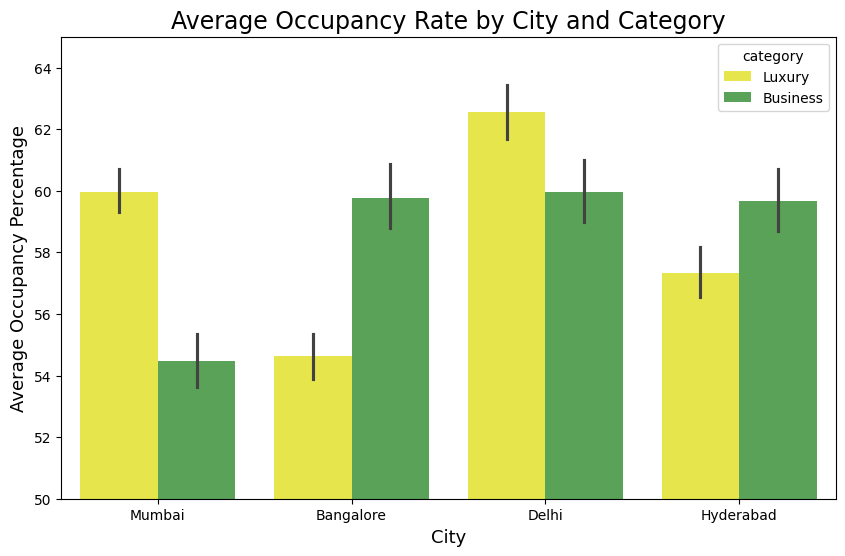

In [30]:
# Bar Plot of Average Occupancy Rate by City grouped by Category
mpl.figure(figsize=(10,6))
sb.barplot(x=data_02['city'], y=data_02['occ_pct'], data=data_02, hue=data_02['category'], palette='Set1_r')
mpl.title('Average Occupancy Rate by City and Category', fontsize=17)
mpl.xlabel('City', fontsize=13)
mpl.ylabel('Average Occupancy Percentage', fontsize=13)
mpl.ylim([50.0,65.0])

(50.0, 65.0)

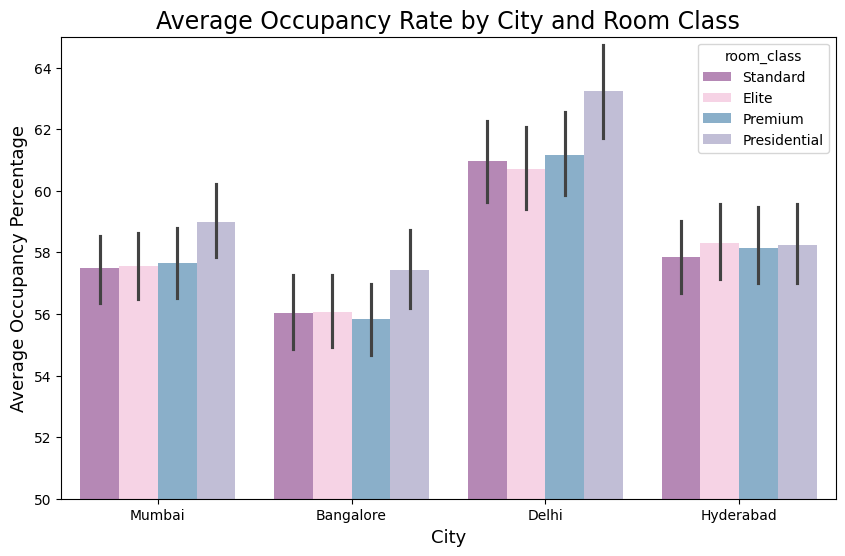

In [31]:
# Bar Plot of Average Occupancy Rate by City grouped by Room Class
mpl.figure(figsize=(10,6))
sb.barplot(x=data_02['city'], y=data_02['occ_pct'], data=data_02, hue=data_02['room_class'], palette='Set3_r')
mpl.title('Average Occupancy Rate by City and Room Class', fontsize=17)
mpl.xlabel('City', fontsize=13)
mpl.ylabel('Average Occupancy Percentage', fontsize=13)
mpl.ylim([50.0,65.0])

##### C. Calculation of Occupancy Rate by Day Type

In [33]:
# Converting format of column 'date' in Dataframe 'dim_date' from Generic format to Datetime format
dim_date.date = pd.to_datetime(dim_date.date)

C:\Users\Mayur\AppData\Local\Temp\ipykernel_20104\215222639.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dim_date.date = pd.to_datetime(dim_date.date)


In [34]:
# Creating new Dataframe by Merging dataframes 'data_01' and 'dim_date' on columns "check_in_date" and "date"
data_03 = pd.merge(data_01, dim_date, left_on="check_in_date", right_on="date")
data_03

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,date,Month & Year,week no,day_type
0,16559,2022-05-01,RT1,25,30,83.33,Standard,2022-05-01,May-22,W 19,weekend
1,19562,2022-05-01,RT1,28,30,93.33,Standard,2022-05-01,May-22,W 19,weekend
2,19563,2022-05-01,RT1,23,30,76.67,Standard,2022-05-01,May-22,W 19,weekend
3,17558,2022-05-01,RT1,13,19,68.42,Standard,2022-05-01,May-22,W 19,weekend
4,16558,2022-05-01,RT1,18,19,94.74,Standard,2022-05-01,May-22,W 19,weekend
...,...,...,...,...,...,...,...,...,...,...,...
9195,16563,2022-07-31,RT4,13,18,72.22,Presidential,2022-07-31,Jul-22,W 32,weekend
9196,16559,2022-07-31,RT4,13,18,72.22,Presidential,2022-07-31,Jul-22,W 32,weekend
9197,17558,2022-07-31,RT4,3,6,50.00,Presidential,2022-07-31,Jul-22,W 32,weekend
9198,19563,2022-07-31,RT4,3,6,50.00,Presidential,2022-07-31,Jul-22,W 32,weekend


[]

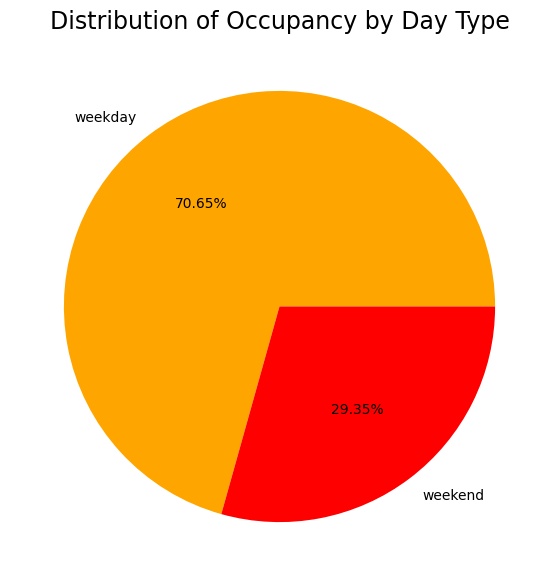

In [35]:
# Plot of Occupancy. When was it better - weekday or weekend?
mpl.figure(figsize=(7,7))
data_03['day_type'].value_counts().plot(kind='pie', colors = ['orange','red'], autopct = '%1.2f%%')
mpl.title('Distribution of Occupancy by Day Type', fontsize=17)
mpl.ylabel('')
mpl.plot()

In [36]:
# Calculating Average Occupancy Rate by Day Type from Dataframe 'data_03'
data_03.groupby("day_type")["occ_pct"].mean()

day_type
weekday    51.807055
weekend    73.960044
Name: occ_pct, dtype: float64

##### D. Calculations of Realized Revenue

In [37]:
# Creating new Dataframe 'dat_04' by Merging dataframes 'fact_booking' and 'dim_hotels' on column "property_id"
data_04 = pd.merge(fact_bookings,dim_hotels,on="property_id")
data_04

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,27-04-2022,01-05-2022,02-05-2022,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,30-04-2022,01-05-2022,02-05-2022,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,28-04-2022,01-05-2022,04-05-2022,2,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT14,16558,28-04-2022,01-05-2022,02-05-2022,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT15,16558,27-04-2022,01-05-2022,02-05-2022,4,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,29-07-2022,31-07-2022,03-08-2022,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai
134586,Jul312217564RT47,17564,30-07-2022,31-07-2022,01-08-2022,4,RT4,logtrip,2.0,Checked Out,38760,38760,Atliq Seasons,Business,Mumbai
134587,Jul312217564RT48,17564,30-07-2022,31-07-2022,02-08-2022,1,RT4,tripster,NaN,Cancelled,32300,12920,Atliq Seasons,Business,Mumbai
134588,Jul312217564RT49,17564,29-07-2022,31-07-2022,01-08-2022,2,RT4,logtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai


In [38]:
# Calculation of Total Realized Revenue by City
data_04.groupby("city")["revenue_realized"].sum()

city
Bangalore    420397050
Delhi        294500318
Hyderabad    325232870
Mumbai       668640991
Name: revenue_realized, dtype: int64

[]

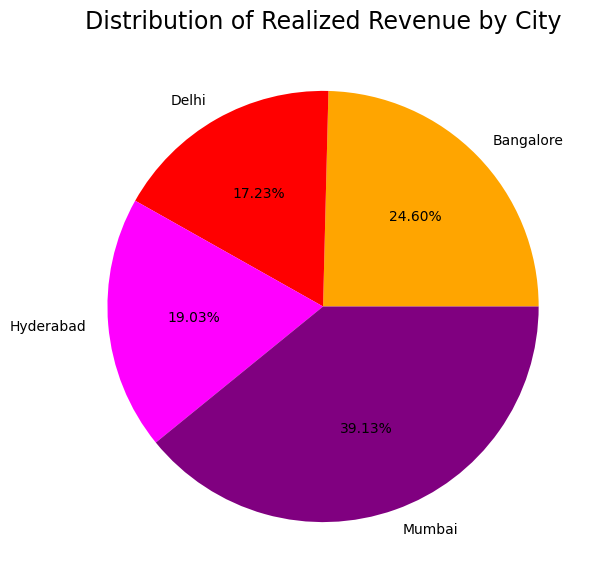

In [39]:
# Pie Chart for Distribution of Occupancy by City
mpl.figure(figsize=(7,7))
data_04.groupby('city')['revenue_realized'].sum().plot(kind='pie', colors = ['orange','red','magenta','purple'], autopct = '%1.2f%%')
mpl.title('Distribution of Realized Revenue by City', fontsize=17)
mpl.ylabel('')
mpl.plot()

In [40]:
# Calculation of Realized Revenue per Hotel Type (Property Type)
data_04.groupby("property_name")["revenue_realized"].sum()

property_name
Atliq Bay        260051178
Atliq Blu        260855522
Atliq City       285811939
Atliq Exotica    320312468
Atliq Grands     211532764
Atliq Palace     304081863
Atliq Seasons     66125495
Name: revenue_realized, dtype: int64

[]

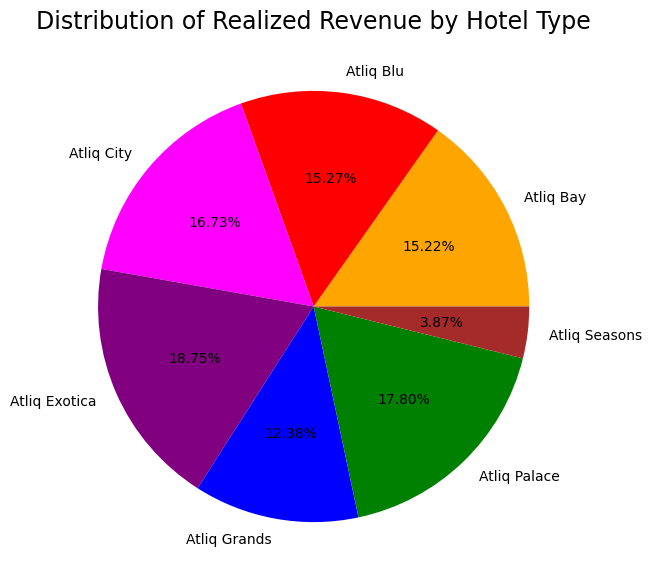

In [41]:
# Pie Chart for Distribution of Realized Revenue by Hotel Type
mpl.figure(figsize=(7,7))
data_04.groupby('property_name')['revenue_realized'].sum().plot(kind='pie', colors = ['orange','red','magenta','purple','blue','green','brown'], autopct = '%1.2f%%')
mpl.title('Distribution of Realized Revenue by Hotel Type', fontsize=17)
mpl.ylabel('')
mpl.plot()

[]

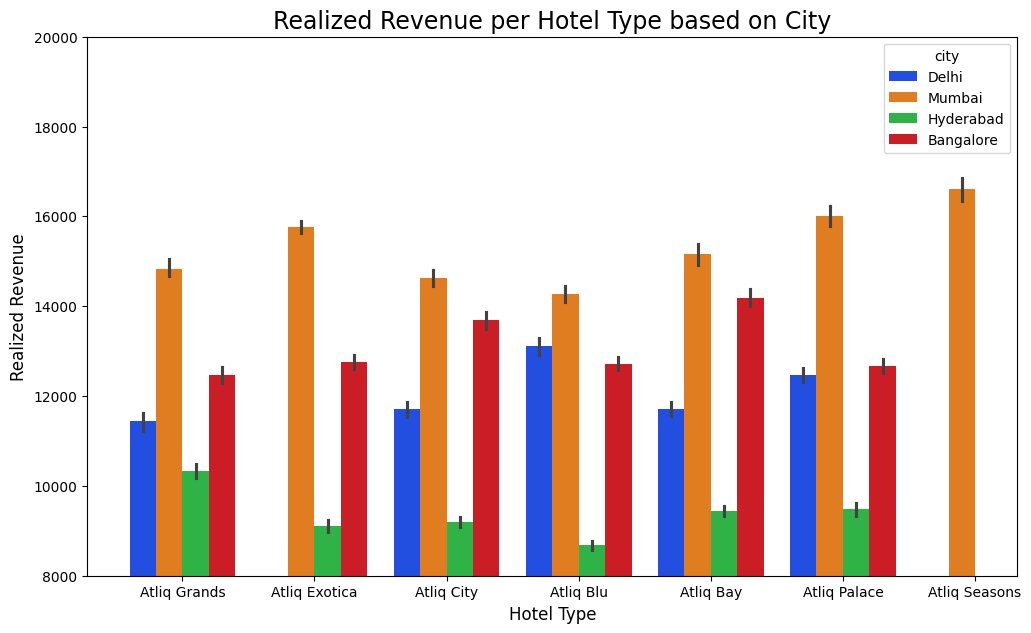

In [42]:
# Bar Plot of Realized Revenue for Every Hotel Type by City
mpl.figure(figsize=(12,7))
sb.barplot(x=data_04['property_name'], y=data_04['revenue_realized'], hue=data_04['city'] ,data=data_04, palette='bright')
mpl.title('Realized Revenue per Hotel Type based on City', fontsize=17)
mpl.xlabel('Hotel Type', fontsize=12)
mpl.ylabel('Realized Revenue',fontsize=12)
mpl.ylim([8000,20000])
mpl.plot()  

[]

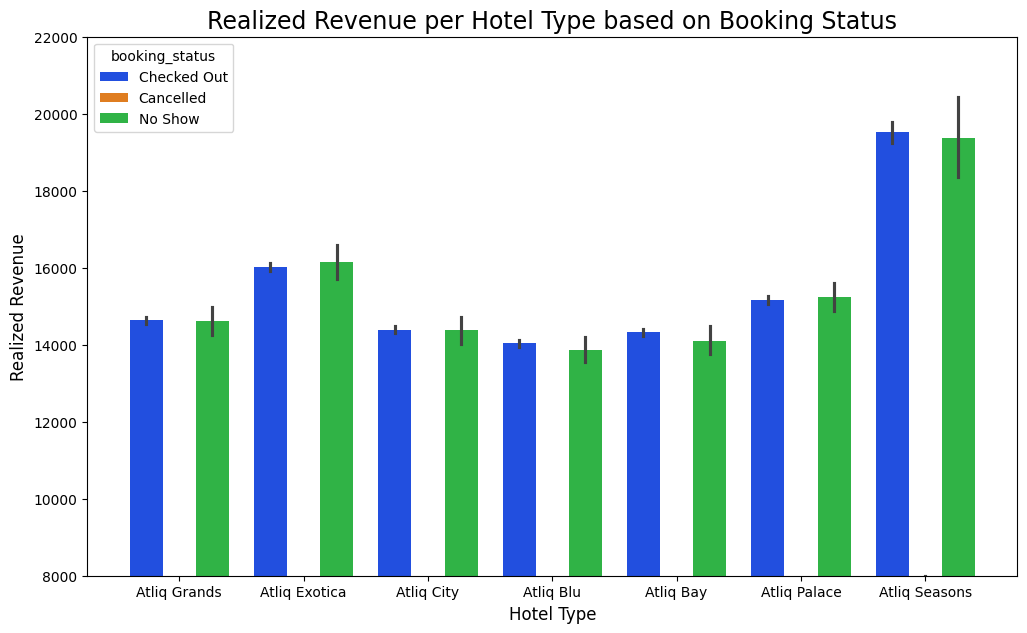

In [45]:
# Bar Plot of Total Realized Revenue for Every Hotel Type base on Booking Status
mpl.figure(figsize=(12,7))
sb.barplot(x=data_04['property_name'], y=data_04['revenue_realized'], hue=data_04['booking_status'], palette='bright')
mpl.title('Realized Revenue per Hotel Type based on Booking Status', fontsize=17)
mpl.xlabel('Hotel Type', fontsize=12)
mpl.ylabel('Realized Revenue',fontsize=12)
mpl.ylim([8000,22000])
mpl.plot()

[]

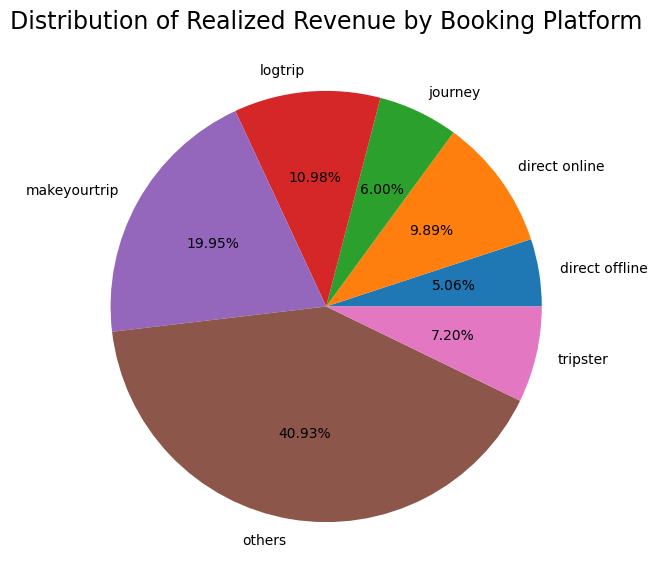

In [44]:
# Pie Chart for Distribution of Realized Revenue per Booking Platform
mpl.figure(figsize=(7,7))
data_04.groupby("booking_platform")['revenue_realized'].sum().plot(kind='pie', autopct = '%1.2f%%')
mpl.title('Distribution of Realized Revenue by Booking Platform', fontsize=17)
mpl.ylabel('')
mpl.plot()